In [2]:
# DATA COllECTION
# ED & LY : PROJECT LOCATION (500 each?) 
# KN : URA DATA (DONE)

# DATA PREPROCESSING
# KN: Combining all ura data (done)
# KN : One Hot Encoding for district, One Hot Encoding for bedrooms 
# KN : Refactor code to display data Prepocessing Step
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium
# KN : Combining bedroom demand & URA data set together
# 
# Models
# ED: Root Mean Squared Error
# ED: KNN
# LY: Ridge regression
# KN: XGBoost
# LY: Display of val accuracy vs test accuracy (Graph display follow lab)

# Additional
# Decision Tree Model, Neural network mdoel



# Codes
# Cleaning project property codes
# precondition: DF need Project name to use this code

# dict_project={}
# for index, row in df.iterrows():
#     try:
#         dict_project[row['Building/Project Name']]
#     except KeyError:
#         if((row['lat']<1.1)or(row['lat']>1.5)):
#             print(row['lat'],row['long'],row['Building/Project Name'])
#             dict_project[row['Building/Project Name']]=1
#         if((row['long']<103)or(row['long']>104)):
#             print(row['lat'],row['long'],row['Building/Project Name'])
#             dict_project[row['Building/Project Name']]=1

# Printing rows with significant values of bedroom
# # for index, row in df.iterrows():
#     if(row['No. of Bedroom(for Non-Landed Only)']=='03'):
#         print(row)
#     if(row['No. of Bedroom(for Non-Landed Only)']=='8'):
#         print(row)

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime
from IPython.display import display, HTML

# SMALLER DATASET JUST FOR TESTING
# df=pd.read_csv('ura_1_5.csv',skiprows=1)
# df=df[:-6] #Get rid of tail non-data description
# display(df.tail(2))

# Large Dataset
df_1_5=pd.read_csv('ura_1_5.csv',skiprows=1)
df_1_5=df_1_5[:-6] #Get rid of tail non-data description
display(df_1_5.tail(2))

df_6_10=pd.read_csv('ura_6_10.csv',skiprows=1)
df_6_10=df_6_10[:-6] #Get rid of tail non-data description
display(df_6_10.tail(2))

df_11_15=pd.read_csv('ura_11_15.csv',skiprows=1)
df_11_15=df_11_15[:-6] #Get rid of tail non-data description
display(df_11_15.tail(2))

df_16_20=pd.read_csv('ura_16_20.csv',skiprows=1)
df_16_20=df_16_20[:-6] #Get rid of tail non-data description
display(df_16_20.tail(2))

df_21_26=pd.read_csv('ura_21_26.csv',skiprows=1)
df_21_26=df_21_26[:-6] #Get rid of tail non-data description
display(df_21_26.tail(2))

df_27_28=pd.read_csv('ura_27_28.csv',skiprows=1)
df_27_28=df_27_28[:-6] #Get rid of tail non-data description
display(df_27_28.tail(2))

print("====================Final Dataframe=======================")
df = pd.concat([df_1_5, df_6_10,df_11_15,df_16_20,df_21_26,df_27_28], ignore_index=True)
display(df.tail(2))

df_dict=pd.read_csv('property_project.csv')
df_dict=df_dict[['address','lat','long']]
df_dict=df_dict.set_index('address').to_dict()
df_dict['lat']['JI XIANG COURT']

dates_dict={
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12    
}

# Preprocessing
# -Converting Floor Area(1400 to 1500 -> 1450)
# -Monthly rental/ sqft> Monthly rental Psf
# -Building/Project Name , District -> lat, long
# -Lease Commencement Date -> date
def g(x):
    if(x=='ANGULLIA PARK RESIDENCES @ ORCHARD'):
        return 'ANGULLIA PARK RESIDENCES@ORCHARD'
    return x
df['Building/Project Name'] = df['Building/Project Name'].apply(g)
    
    
def f(x):
    try:
        return sum([int(item) for item in str(x).split(' to ')])/2
    except:
        return 0
df['Floor Area (sq ft)'] = df['Floor Area (sq ft)'].apply(f)
df['Monthly Rent/ psf']=df['Monthly Gross Rent($)']/df['Floor Area (sq ft)']
df['lat']=df['Building/Project Name'].apply(lambda x:df_dict['lat'][x])
df['long']=df['Building/Project Name'].apply(lambda x:df_dict['long'][x])
def g(x):
    m,y=x.split('-')
    return pd.Timestamp(int(y),dates_dict[m],1).toordinal()
df['Lease Commencement Date']=df['Lease Commencement Date'].apply(g).astype(float)
# # Remove missing bedroom data
df['No. of Bedroom(for Non-Landed Only)']=df['No. of Bedroom(for Non-Landed Only)'].replace('na*',np.NaN)
df=df.dropna()
df = df.drop(df[df["Floor Area (sq ft)"]<50].index)

dict_project={}
for index, row in df.iterrows():
    try:
        dict_project[row['Building/Project Name']]
    except KeyError:
        if((row['lat']<1.1)or(row['lat']>1.5)):
            print(row['lat'],row['long'],row['Building/Project Name'])
            dict_project[row['Building/Project Name']]=1
        if((row['long']<103.73)or(row['long']>104)):
            print(row['lat'],row['long'],row['Building/Project Name'])
            dict_project[row['Building/Project Name']]=1

# One Hot Encoding for Bed Room
df.rename(columns={'No. of Bedroom(for Non-Landed Only)':'no_bedroom'}, inplace=True)# Rename Bed Room

df = pd.concat([df,pd.get_dummies(df['no_bedroom'], prefix='no_bedroom')],axis=1)
display(df.head(2))

# # consolidaiton of Data
df=df[['Monthly Gross Rent($)','Monthly Rent/ psf','Postal District','lat','long','no_bedroom','Floor Area (sq ft)','Lease Commencement Date']]
df['no_bedroom']=df['no_bedroom'].astype(float)
df['Floor Area (sq ft)']=df['Floor Area (sq ft)'].astype(float)


# KN : One Hot Encoding for district, One Hot Encoding for bedrooms
# KN : Refactor code to display data Prepocessing Step
df=df.rename(index=str, columns={"Monthly Gross Rent($)": "monthly_gross_rent", "Monthly Rent/ psf": "monthly_rent_psf","Postal District":"district","lat": "lat","long": "long","no_bedroom": "no_bedroom","Floor Area (sq ft)": "floor_area","Lease Commencement Date": "date" })
print("====================Preprocessed Dataframe=======================")
display(df.tail(3))


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
35483,35484,MERAPRIME,JALAN BUKIT HO SWEE,3.0,Non-landed Properties,2,5000.0,800 to 900,Nov-2015
35484,35485,ONE SHENTON,SHENTON WAY,1.0,Non-landed Properties,2,5200.0,1000 to 1100,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
53877,53878,RIVERGATE,ROBERTSON QUAY,9.0,Non-landed Properties,2,5600.0,1000 to 1100,Nov-2015
53878,53879,CITY SQUARE RESIDENCES,KITCHENER LINK,8.0,Non-landed Properties,4,5400.0,1500 to 1600,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
59050,59051,VILLA MARINA,JALAN SEMPADAN,15.0,Non-landed Properties,3,3000.0,1200 to 1300,Nov-2015
59051,59052,D'MIRA,BOON TECK ROAD,12.0,Non-landed Properties,2,3200.0,900 to 1000,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
44159,44160,LIVIA,PASIR RIS GROVE,18.0,Non-landed Properties,4,4000.0,1500 to 1600,Nov-2015
44160,44161,RIO VISTA,UPPER SERANGOON VIEW,19.0,Non-landed Properties,4,3100.0,1300 to 1400,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
26456,26457,FORESQUE RESIDENCES,PETIR ROAD,23.0,Non-landed Properties,3,3200.0,1100 to 1200,Nov-2015
26457,26458,HILLINGTON GREEN,HILLVIEW AVENUE,23.0,Non-landed Properties,3,2850.0,1300 to 1400,Nov-2015


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
4679,4680,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2700.0,1100 to 1200,Nov-2015
4680,4681,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2500.0,1100 to 1200,Nov-2015


====================Final Dataframe=======================


,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
223714,4680,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2700.0,1100 to 1200,Nov-2015
223715,4681,H2O RESIDENCES,FERNVALE LINK,28.0,Non-landed Properties,3,2500.0,1100 to 1200,Nov-2015


1.428903 103.720192 SKY GREEN
1.350457 103.728965 THE MORNING GLORY
1.342861 103.717972 CASPIAN
1.3466209999999998 103.723534 THE LAKESHORE
1.339987 103.70489 THE CENTRIS
1.3444559999999999 103.717264 PARC VISTA
1.341956 103.716318 LAKEHOLMZ
1.345719 103.725392 LAKEVILLE
1.342912 103.719605 THE LAKEFRONT RESIDENCES
1.431605 103.7099 THE DAIRY FARM


,S/N,Building/Project Name,Street Name,Postal District,Type,no_bedroom,Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date,Monthly Rent/ psf,lat,long,no_bedroom_1,no_bedroom_2,no_bedroom_3,no_bedroom_4,no_bedroom_5,no_bedroom_6,no_bedroom_8
1,2,HIGHLINE RESIDENCES,KIM TIAN ROAD,3.0,Non-landed Properties,3,5000.0,950.0,736968.0,5.263158,1.284685,103.829812,0,0,1,0,0,0,0
2,3,ONE-NORTH RESIDENCES,ONE-NORTH GATEWAY,5.0,Non-landed Properties,4,6000.0,1550.0,736968.0,3.870968,1.302612,103.789997,0,0,0,1,0,0,0


====================Preprocessed Dataframe=======================


,monthly_gross_rent,monthly_rent_psf,district,lat,long,no_bedroom,floor_area,date
223713,2400.0,2.823529,27.0,1.438604,103.831283,2.0,850.0,735903.0
223714,2700.0,2.347826,28.0,1.392766,103.879232,3.0,1150.0,735903.0
223715,2500.0,2.173913,28.0,1.392766,103.879232,3.0,1150.0,735903.0


In [4]:

X=np.array(df.drop(['monthly_gross_rent','monthly_rent_psf'],1))
Y=np.array(df['monthly_rent_psf'])
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)
clf= LinearRegression()
clf.fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
accuracy=clf.score(X_test,y_test)
clf,accuracy

(158500, 6)
(39625, 6)
(158500,)
(39625,)


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 0.4624717484676729)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

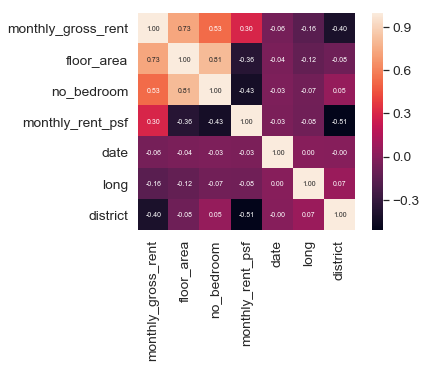

In [5]:
train=df
# Top 10 Heatmap
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'monthly_gross_rent')['monthly_gross_rent'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [7]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,monthly_gross_rent
1,floor_area
2,no_bedroom
3,monthly_rent_psf
4,date
5,long
6,district


C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


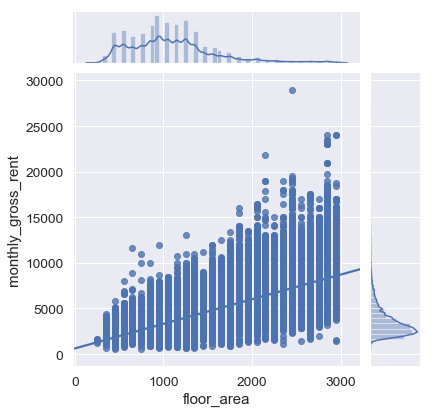

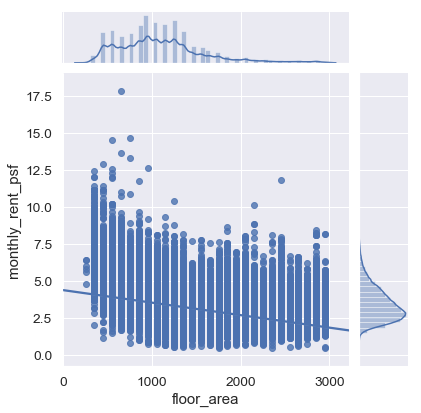

In [8]:
# Living Area vs Sale Price
# 'Monthly Gross Rent($)','Monthly Rent/ psf','lat','long','No. of Bedroom(for Non-Landed Only)','Floor Area (sq ft)','Lease Commencement Date'
sns.jointplot(x=train['floor_area'], y=train['monthly_gross_rent'], kind='reg')
sns.jointplot(x=train['floor_area'], y=train['monthly_rent_psf'], kind='reg')

In [ ]:
# Count of project being rented,
# Count of Bed Room
# 

bedroom_1=df[(df.no_bedroom>0.9)&(df.no_bedroom <1.1)]
bedroom_2=df[(df.no_bedroom>1.9)&(df.no_bedroom <2.1)]
bedroom_3=df[(df.no_bedroom>2.9)&(df.no_bedroom <3.1)]
bedroom_4=df[(df.no_bedroom>3.9)&(df.no_bedroom <4.1)]
bedroom_5=df[(df.no_bedroom>4.9)&(df.no_bedroom <5.1)]
# print(bedroom_1, bedroom_2,bedroom_3,bedroom_4,bedroom_5)
display(bedroom_1.count())
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium



# KN : Combining bedroom demand & URA data set together
sns.jointplot(x=train['no_bedroom'], y=train['district'], kind='kde')
sns.jointplot(x=train['lat'], y=train['long'], kind='kde')


monthly_gross_rent    41507
monthly_rent_psf      41507
district              41507
lat                   41507
long                  41507
no_bedroom            41507
floor_area            41507
date                  41507
dtype: int64

C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


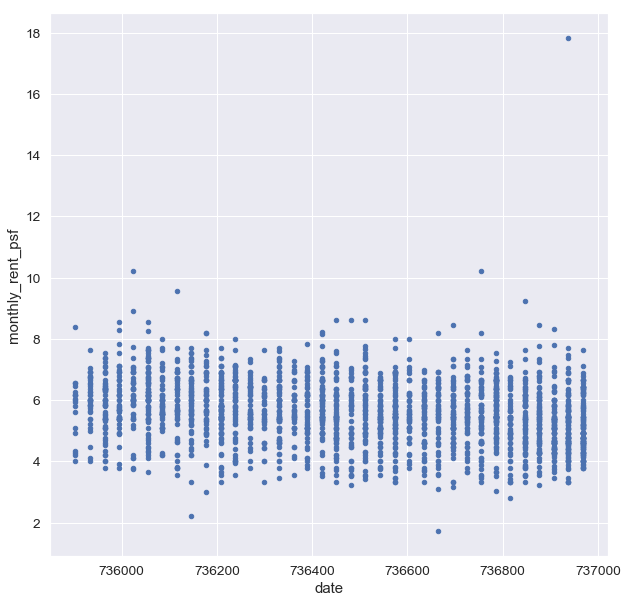

In [10]:
bedroom_1[(bedroom_1.district>0.9)&(bedroom_1.district<1.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

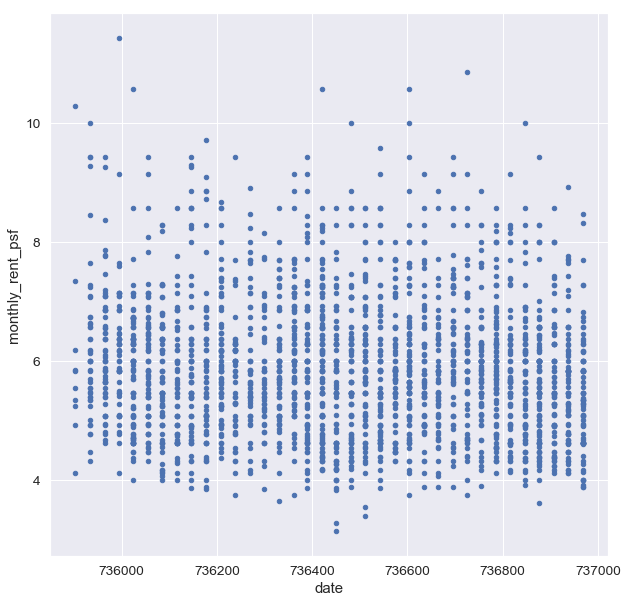

In [11]:
bedroom_1[(bedroom_1.district>1.9)&(bedroom_1.district<2.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

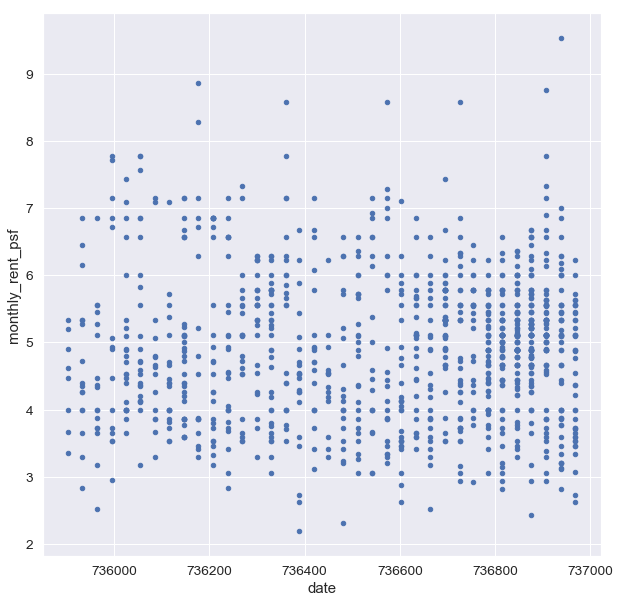

In [12]:
bedroom_1[(bedroom_1.district>2.9)&(bedroom_1.district<3.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

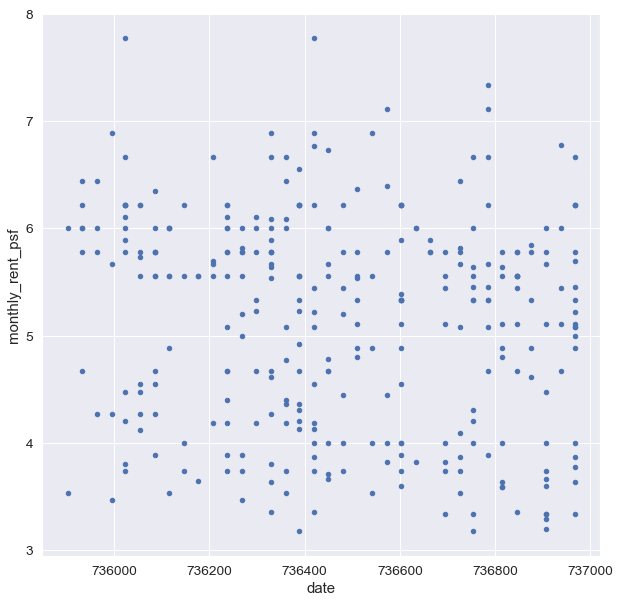

In [13]:
bedroom_1[(bedroom_1.district>3.9)&(bedroom_1.district<4.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

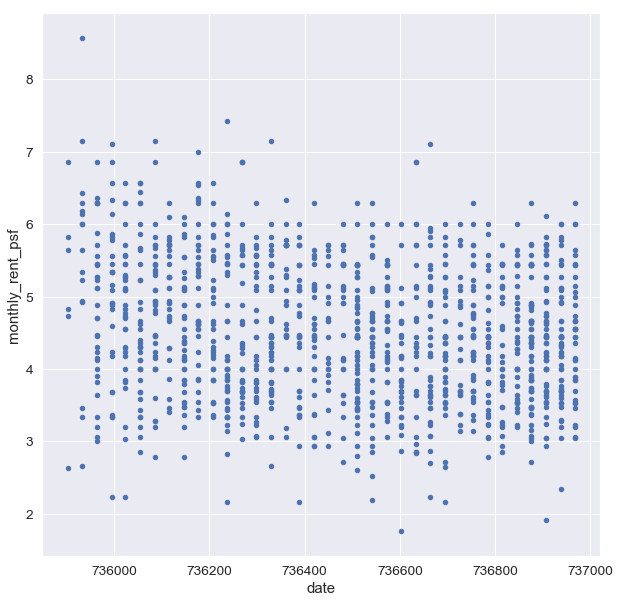

In [14]:
bedroom_1[(bedroom_1.district>4.9)&(bedroom_1.district<5.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198125 entries, 1 to 223715
Data columns (total 8 columns):
monthly_gross_rent    198125 non-null float64
monthly_rent_psf      198125 non-null float64
district              198125 non-null float64
lat                   198125 non-null float64
long                  198125 non-null float64
no_bedroom            198125 non-null float64
floor_area            198125 non-null float64
date                  198125 non-null float64
dtypes: float64(8)
memory usage: 13.6+ MB


Text(0.5,1,'monthly_rent_psf')

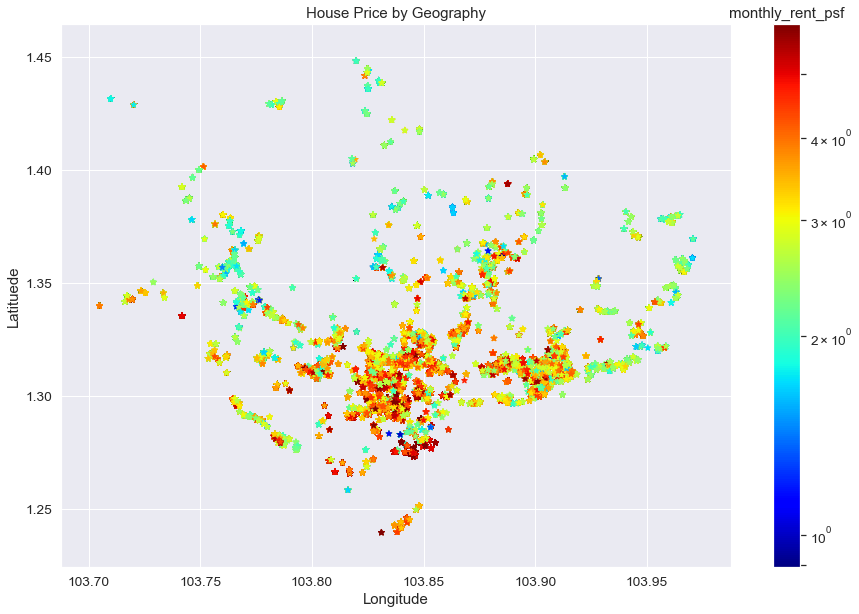

In [6]:
from matplotlib import colors


plt.figure(figsize=(15,10))
vmin = np.min(train.monthly_rent_psf)
vmax = np.max(train.monthly_rent_psf)
norm = colors.LogNorm(vmin*2,vmax/3)
plt.scatter(train.long,train.lat, marker='*',c=train.monthly_rent_psf,norm=norm,cmap='jet') 
plt.xlabel('Longitude')
plt.ylabel('Latituede')
plt.title('House Price by Geography')
clb = plt.colorbar() 
clb.ax.set_title('monthly_rent_psf')

In [ ]:
# Ridge, Lasso
# XGBoost
# NN

# ridge for lat long?

In [ ]:
# DATA COllECTION
# ED & LY : PROJECT LOCATION (500 each?) 
# KN : URA DATA

# DATA PREPROCESSING
# KN : One Hot Encoding for district, One Hot Encoding for bedrooms
# KN : Refactor code to display data Prepocessing Step
# LY : 1) Number of bedroom demand, avg price-psf by district to display in follium
# KN : Combining bedroom demand & URA data set together
# 
# Models
# ED: Root Mean Squared Error
# ED: KNN
# LY: Ridge regression
# KN: XGBoost
# LY: Display of val accuracy vs test accuracy (Graph display follow lab)

# Additional
# Decision Tree Model, Neural network mdoel